<a href="https://colab.research.google.com/github/M-Matz/MBA-IBMEC-series-temporais/blob/main/Atividade_Dissertativa_Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-Trabalho: Instalação de pacotes basicos para analise

In [2]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [7]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 43.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


#Carregar bibliotecas basicas

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import statsmodels.api as sm
import plotly.offline as py
import plotly.graph_objs as go
from sklearn import metrics
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib.pylab import rcParams
from pmdarima import auto_arima

ImportError: ignored

In [46]:
from plotly.subplots import make_subplots

##Ex1: Recuperar os dados dos valores de BTC no periodo de 01-12-2021 a 01-01-2022


In [25]:
df = yf.download('BTC-USD', start = '2021-12-01', end= '2022-01-01', groupby="ticker")
pd.options.display.max_rows = 10
print(df)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2021-12-01  56907.964844  59041.683594  56553.082031  57229.828125   
2021-12-02  57217.371094  57349.234375  55895.132812  56477.816406   
2021-12-03  56509.164062  57482.167969  52496.585938  53598.246094   
2021-12-04  53727.878906  53904.679688  42874.617188  49200.703125   
2021-12-05  49201.519531  49768.148438  47857.496094  49368.847656   
...                  ...           ...           ...           ...   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   
2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000   
2021-12-31  47169.371094  48472.527344  45819.953125  46306.445312   

               Adj C

In [26]:
df.drop(labels=["Open","High","Low","Volume","Adj Close","Volume"],axis=1, inplace=True)

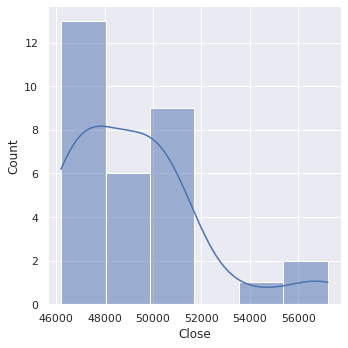

In [27]:
sns.set_theme(style="darkgrid")

sns.displot(df['Close'].dropna(), kde=True)



In [30]:

dados = [go.Scatter(x=df.index, y=df['Close'])]
layout = go.Layout(title= 'Historico do Preço de Bitcoins periodo 01-12-2021 a 01-01-2022',
                   yaxis = {'title': 'Preços'},
                   xaxis = {'title': 'Período'})
fig = go.Figure(data=dados, layout= layout)
py.iplot(fig)

#Ex2. Efetuando Decomposicao aditiva e Decomposicao multiplicativa



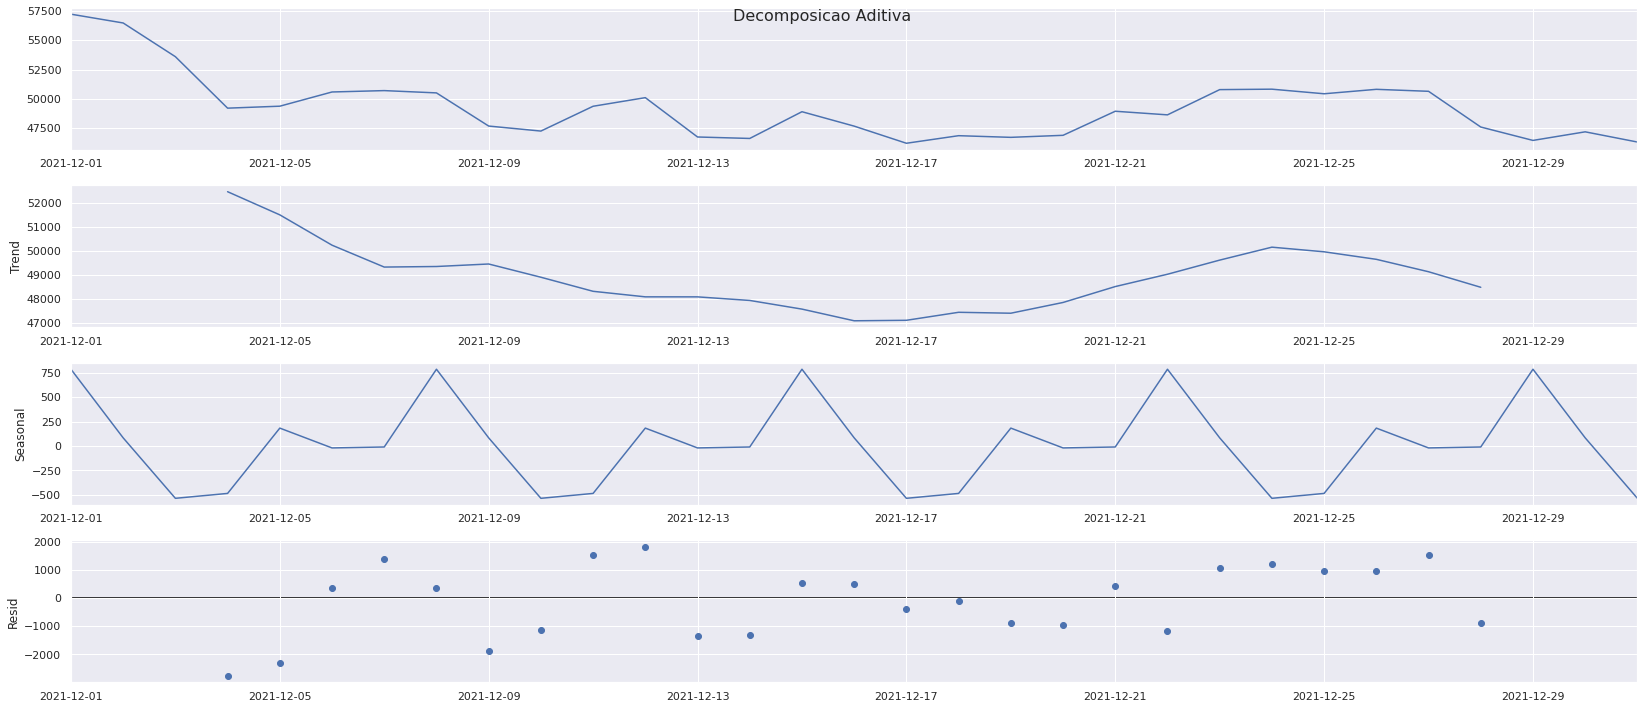

In [36]:
result = seasonal_decompose(df, model='additive')
result
fig = result.plot()
fig.set_size_inches((23, 10))
fig.suptitle("Decomposicao Aditiva", fontsize=16)
fig.tight_layout()
fig.show()

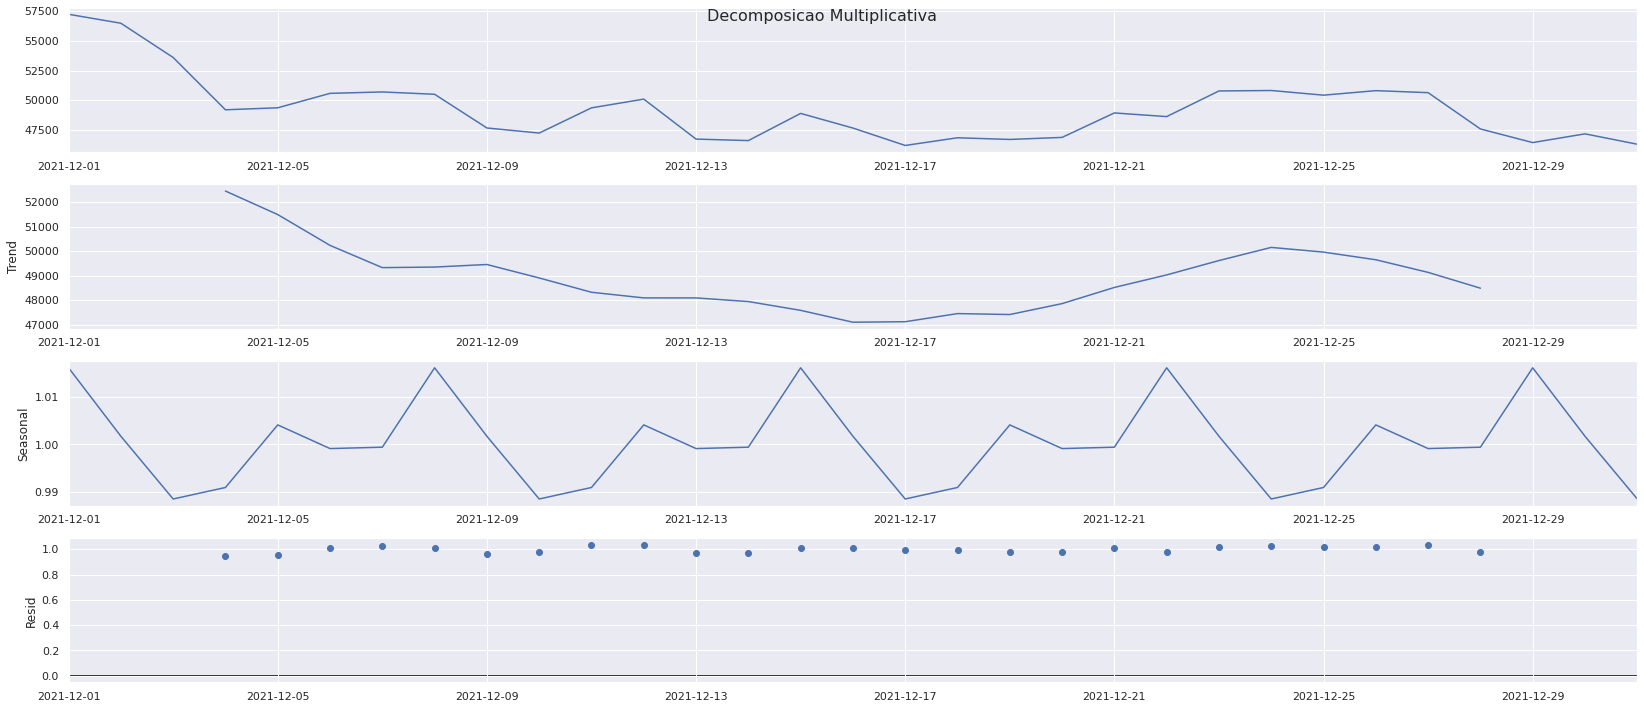

In [35]:
result = seasonal_decompose(df, model='multiplicative')
result
fig = result.plot()
fig.set_size_inches((23, 10))
fig.suptitle("Decomposicao Multiplicativa", fontsize=16)
fig.tight_layout()
fig.show()

#Ex3. Media Movel

In [38]:
 dados_mm = df
 janela = 3

 mm2 = pd.DataFrame.rolling(dados_mm,window=2,center=False).mean()
 mm3 = pd.DataFrame.rolling(dados_mm,window=3,center=False).mean()
 mm4 = pd.DataFrame.rolling(dados_mm,window=4,center=False).mean()
 

In [166]:
#dados_mm2 = [go.Scatter(x=mm2.index, y=mm2['Close'])]
#dados_mm3 = [go.Scatter(x=mm3.index, y=mm3['Close'])]
#dados_mm4 = [go.Scatter(x=mm4.index, y=mm4['Close'])]

fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    vertical_spacing=0.02)
fig.add_trace(go.Scatter(x=mm2.index, y=mm2['Close'],name='MM - Janela 2'), row=1, col=1)
fig.add_trace(go.Scatter(x=mm3.index, y=mm3['Close'],name='MM - Janela 3'), row=2, col=1)
fig.add_trace(go.Scatter(x=mm4.index, y=mm4['Close'],name='MM - Janela 4'), row=3, col=1)
fig.update_layout(
    font_family="Averta",
    hoverlabel_font_family="Averta",
    title_text="Suavizacao Medias Moveis, janela 2, 3 e 4",
    yaxis1_title_text="Preços",
    yaxis2_title_text="Preços",
    xaxis3_title_text="Periodo",
    yaxis3_title_text="Preços",
    hoverlabel_font_size=16,
    showlegend=False,
    height=800, 
    width=1000
)

py.iplot(fig)

##Suavizacao de Medias Moveis, comparando no mesmo grafico...

In [72]:
dados = [go.Scatter(x=df.index, y=df['Close'], name="BTC no Periodo")]
layout = go.Layout(title= 'Comparação Medias Moveis e Historico do Preço de Bitcoins',
                   yaxis = {'title': 'Preços'},
                   xaxis = {'title': 'Período'})
fig = go.Figure(data=dados, layout= layout)
fig.add_traces(go.Scatter(x=mm2.index, y=mm2['Close'], name="Media Movel k=2"))
fig.add_traces(go.Scatter(x=mm3.index, y=mm3['Close'], name="Media Movel k=3"))
fig.add_traces(go.Scatter(x=mm4.index, y=mm4['Close'], name="Media Movel k=4"))
py.iplot(fig)

#Ex.4 - Aplicação do ARIMA


In [240]:
treinamento, teste = df[0:int(len(df)*0.7)],df[int(len(df)*0.7):-1]
historico = [x for x in treinamento['Close'].values]
teste = teste['Close'].values
treinamento = treinamento['Close'].values
modelo_preditivo= []
n_obs = len(teste)

In [241]:
print(treinamento.shape)
print(teste.shape)


(21,)
(9,)


### Calculando melhores coeficientes usando o Auto ARIMA

In [242]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(treinamento,
                          trace=True,
                          suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=364.040, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=360.466, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=362.519, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=362.898, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=359.506, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.367 seconds


In [243]:
historico
intervalo_total=df.index
intervalo_dos_dados_de_teste = df[int(len(df)*0.7):-1].index


In [244]:
for ponto_teste in range(n_obs):
  modelo_arima = ARIMA(historico, order=(0,1,0))  
  modelo_fit = modelo_arima.fit(disp=0)
  saida = modelo_fit.forecast()
  yhat = np.asscalar(saida[0])
  modelo_preditivo.append(yhat)
  valor_real_teste = teste[ponto_teste]
  historico.append(valor_real_teste)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead



###Calculo de Erro MSE

In [245]:
erroMSE = mean_squared_error(teste, modelo_preditivo)
print('O Erro Médio Quadrado (MSE) é {}'.format(erroMSE))

O Erro Médio Quadrado (MSE) é 1873718.064493214


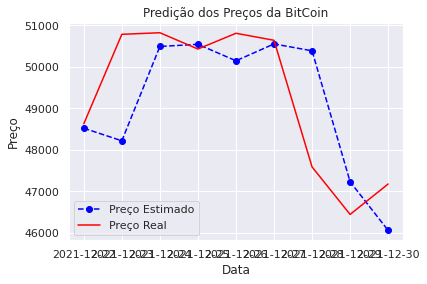

In [246]:
# Teste e Predicao do Modelo 

plt.plot(intervalo_dos_dados_de_teste, 
         modelo_preditivo, 
         color='blue', 
         marker='o', 
         linestyle='dashed',
         label='Preço Estimado')

plt.plot(intervalo_dos_dados_de_teste, 
         teste, 
         color='red', 
         label='Preço Real')

plt.title('Predição dos Preços da BitCoin')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

##Graficos de Comparacao do preço de Bitcoins

In [247]:
layout = go.Layout(title= 'Comparação Preço de Bitcoins Predição vs Preço Real',
                   yaxis = {'title': 'Preços'},
                   xaxis = {'title': 'Período'})

dados = [go.Scatter(x=intervalo_total, y=historico, name="Periodo total")
    ]
fig = go.Figure(data=dados, layout= layout)
fig.add_traces(go.Scatter(x=intervalo_dos_dados_de_teste, y=modelo_preditivo, name="Preco Estimado"))
fig.add_traces(go.Scatter(x=intervalo_dos_dados_de_teste, y=teste, name="Preço Real"))

py.iplot(fig)

### Shift lookback

In [273]:
layout = go.Layout(title= 'Comparação Preço de Bitcoins Predição (lookback) vs Preço Real',
                   yaxis = {'title': 'Preços'},
                   xaxis = {'title': 'Período'})

modelo_lookback = []
for i in range(len(intervalo_dos_dados_de_teste)):
  if i+1 > (len(modelo_preditivo)-1):
      pass
  else:
      modelo_lookback.append(modelo_preditivo[i+1])
if len(modelo_lookback) < len(modelo_preditivo):
      modelo_lookback.append(modelo_preditivo[-1])
dados = [go.Scatter(x=intervalo_total, y=historico, name="Periodo total")
    ]
fig = go.Figure(data=dados, layout= layout)
#fig.add_traces(go.Scatter(x=intv_teste_lookback, y=modelo_preditivo, name="Preco Estimado"))
fig.add_traces(go.Scatter(x=intervalo_dos_dados_de_teste, y=modelo_lookback, name="Preco Estimado"))
fig.add_traces(go.Scatter(x=intervalo_dos_dados_de_teste, y=teste, name="Preço Real"))

py.iplot(fig)